In [656]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Para ignorar los warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split  # Para dividir los datos en train y test
from sklearn.utils import resample # Ponemos las mismas longitudes a cada variable

# Librerias para el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Librerias para valorar el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [658]:
df = pd.read_excel('C:/Users/jor14/Desktop/ALLpreprocessed.xlsx')

In [659]:
# Extraemos los datos (variable dependiente y variables independientes)
X = df.drop('Result', axis=1)
y = df['Result']

In [660]:
print(X.shape)

(50, 37)


In [661]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, stratify=y, random_state=42)

In [662]:
# Ahora nuestras variables seran vectores
y_train = y_train.values
X_test = X_test.values
X_train = X_train.values
y_test = y_test.values

In [663]:
nombres_caracteristicas = X.columns
print(nombres_caracteristicas)

Index(['IL6', 'Ferritin', 'PCR', 'CD4', 'CD8', 'DimerD', 'Glucose',
       'Creatinin', 'GPT', 'Hemoglobina', 'Lymphocytes',
       'wavelet-LHH_firstorder_Skewness', 'wavelet-HLL_firstorder_Skewness',
       'wavelet-HHL_firstorder_Median', 'wavelet-HHL_glcm_ClusterShade',
       'wavelet-HHL_ngtdm_Busyness', 'wavelet-HHH_firstorder_Mean',
       'wavelet-HHH_firstorder_Median', 'square_ngtdm_Strength',
       'exponential_glszm_SmallAreaLowGrayLevelEmphasis',
       'gradient_firstorder_Minimum', 'Sex', 'Neurological_diseases',
       'Cardiovascular_diseases', 'Respiratory_diseases',
       'Days_hospitalization', 'GDS_2', 'GDS_3', 'GDS_4', 'GDS_5', 'GDS_6',
       'Barthel_scale_2', 'Barthel_scale_3', 'Barthel_scale_5',
       'Pulmonary_affectation_1', 'Pulmonary_affectation_2',
       'Pulmonary_affectation_4'],
      dtype='object')


In [664]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [665]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [666]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
n=9

In [667]:
print(feature_scores)

PCR                                                0.094271
Days_hospitalization                               0.077387
wavelet-HLL_firstorder_Skewness                    0.060552
GPT                                                0.053240
IL6                                                0.048340
Creatinin                                          0.045752
Ferritin                                           0.041141
wavelet-HHL_glcm_ClusterShade                      0.040534
Barthel_scale_3                                    0.039996
DimerD                                             0.039790
wavelet-HHL_firstorder_Median                      0.039384
gradient_firstorder_Minimum                        0.037494
wavelet-HHH_firstorder_Median                      0.037072
wavelet-HHH_firstorder_Mean                        0.031891
Glucose                                            0.029924
CD4                                                0.028625
CD8                                     

In [668]:
selected_features = feature_scores.index.values[:n]
print(selected_features)

cols_index = [X.columns.tolist().index(col) for col in selected_features]

['PCR' 'Days_hospitalization' 'wavelet-HLL_firstorder_Skewness' 'GPT'
 'IL6' 'Creatinin' 'Ferritin' 'wavelet-HHL_glcm_ClusterShade'
 'Barthel_scale_3']


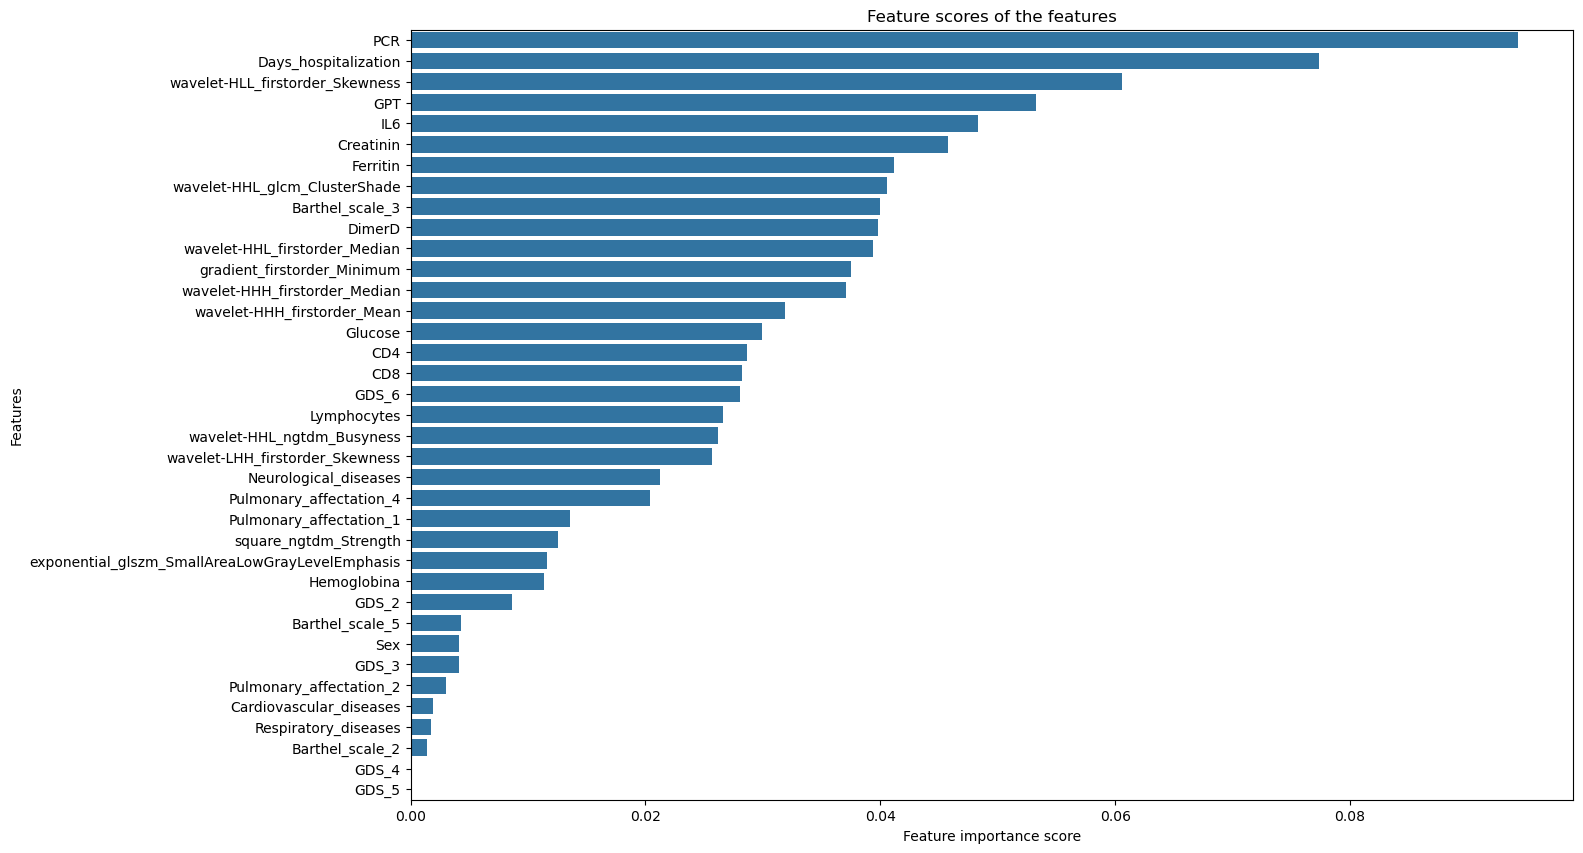

In [669]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [670]:
X_train = X_train[:, cols_index]
X_test = X_test[:, cols_index]

In [671]:
# Implementar validación cruzada
cv = StratifiedKFold(n_splits=5)
pred_cv = cross_val_predict(clf, X_train, y_train, cv=cv)

In [672]:
fpr, tpr, thresholds = roc_curve(y_train, pred_cv)
roc_auc = auc(fpr, tpr)

In [673]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])

In [674]:
# Generar la matriz de confusión
mat_con = confusion_matrix(y_train, pred_cv)
mat_con = np.flipud(mat_con)
mat_con = np.fliplr(mat_con)

In [675]:
mat_con = (confusion_matrix(y_train, pred_cv))
mat_con = np.flipud(mat_con)
mat_con = np.fliplr(mat_con)

In [676]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, pred_cv)))
print('Precisión: {:.2f}'.format(precision_score(y_train, pred_cv)))
print('Recall: {:.2f}'.format(recall_score(y_train, pred_cv)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, pred_cv)))
print('AUC: {:.2f}'.format(auc(fpr, tpr)))
print('Matriz de confusión:')
print(mat_con)
print_confusion_matrix(y_train, pred_cv)

Accuracy: 0.76
Precisión: 0.79
Recall: 0.87
F1 Score: 0.83
AUC: 0.69
Matriz de confusión:
[[27  4]
 [ 7  7]]
True positive =  27
False positive =  7
False negative =  4
True negative =  7


In [677]:
# Obtener la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_train, pred_cv).ravel()

# Calcular la especificidad
especificidad = tn / (tn + fp)

print(f'Especificidad: {especificidad:.2f}')

Especificidad: 0.50


In [678]:
print(tpr)

[0.         0.87096774 1.        ]


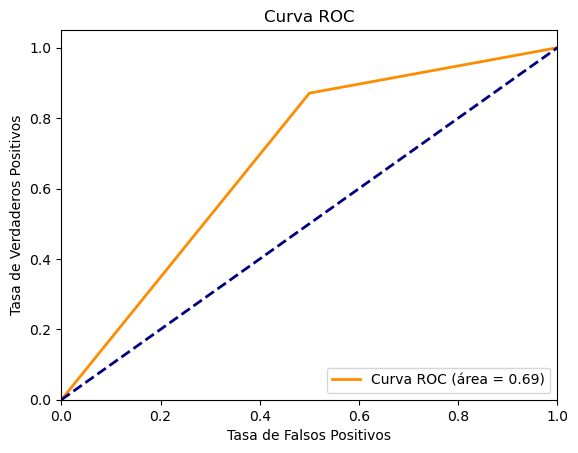

In [679]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

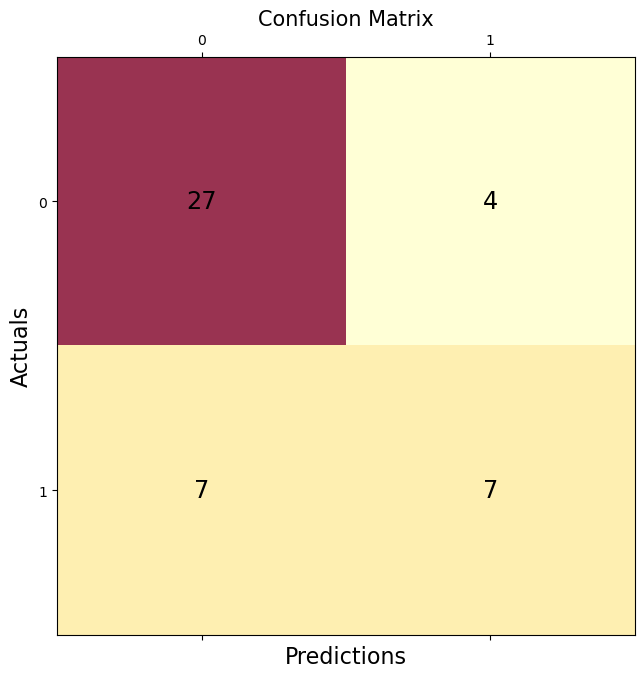

In [680]:
# Setting the attributes
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.8)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[n, m], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [681]:
print(len(pred_cv))
print(len(y_train))

45
45


In [682]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)

In [683]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

In [684]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])

In [685]:
mat_con = (confusion_matrix(y_test, pred))
mat_con = np.flipud(mat_con)
mat_con = np.fliplr(mat_con)

In [686]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred)))
print('Precisión: {:.2f}'.format(precision_score(y_test, pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, pred)))
print('AUC: {:.2f}'.format(auc(fpr, tpr)))
print('Matriz de confusión:')
print(mat_con)
print_confusion_matrix(y_test, pred)

Accuracy: 0.60
Precisión: 0.60
Recall: 1.00
F1 Score: 0.75
AUC: 0.50
Matriz de confusión:
[[3 0]
 [2 0]]
True positive =  3
False positive =  2
False negative =  0
True negative =  0


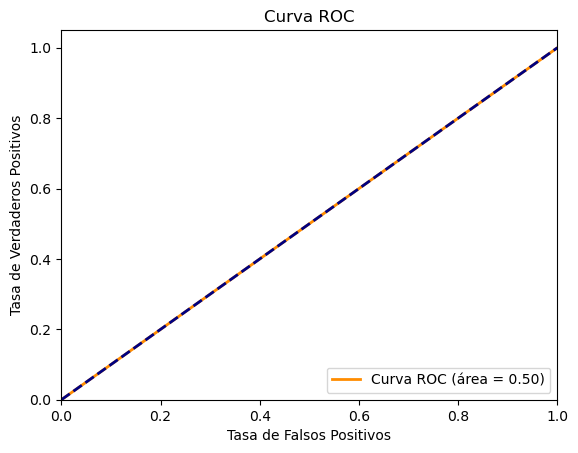

In [687]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

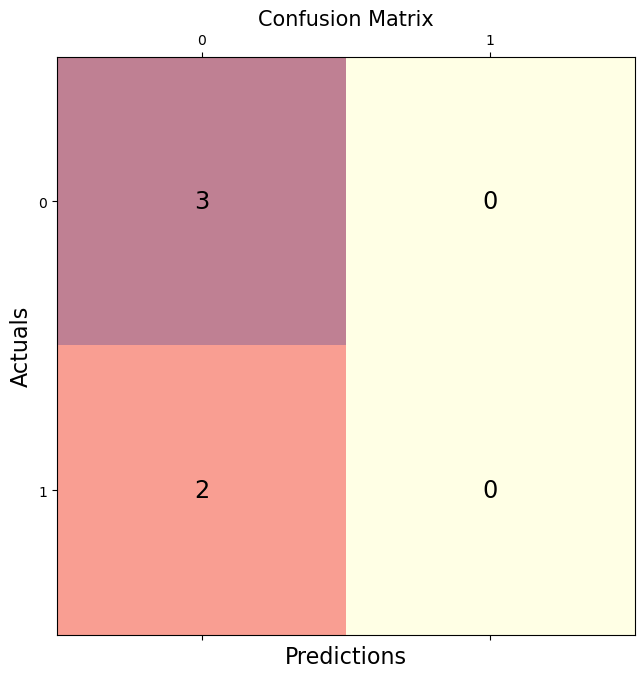

In [688]:
# Setting the attributes
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[n, m], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

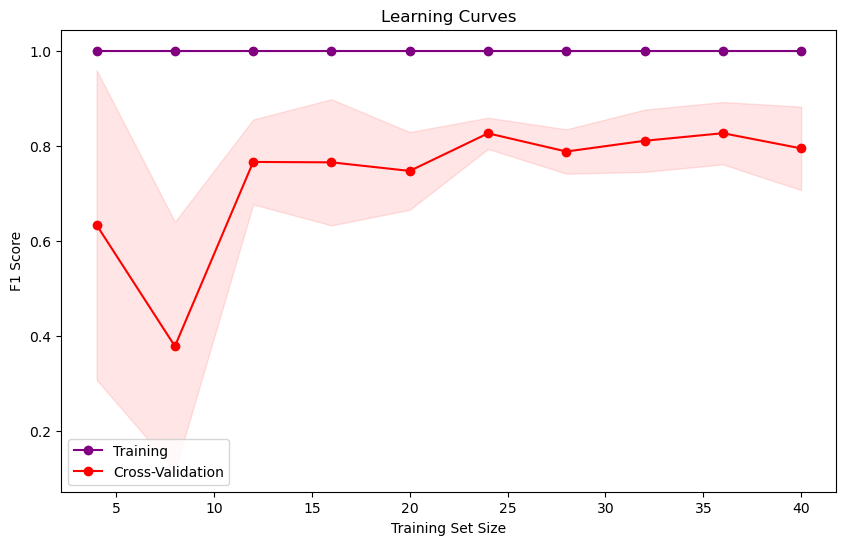

In [689]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a model 'lr' and a dataset X, y
train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='purple', label='Training')
plt.plot(train_sizes, valid_mean, 'o-', color='red', label='Cross-Validation')

# Fill between the standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='purple', alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='red', alpha=0.1)

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.show()
